# Exercise 17: Regularized regression

This homework assignment is designed to give you an intuition as an interesting property of regularization in the context of ultra-high dimensional statistical problems.

You won't need to load in any data for this homework.

---
## 1. Simulating & visualizing data (2 points)

We are going to be looking at what happens in the context where $p>n$. In order to have total control over our data, we will use simulations for this homework. First, we will need to load the `glmnet`, `tidyverse`, and `ggplot2` libraries for this assignment. 


In [1]:
# load/install packages
install.packages("glmnet", dependencies = TRUE)
install.packages("ggplot2")
library(glmnet)
library(tidyverse)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘Rcpp’, ‘RcppEigen’, ‘lars’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix

Loaded glmnet 4.1-7

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()



In [3]:
# disable warning messages
options(warn = -1)

We are going to generate a data set with complex structure and try to recover it using polynomial models. For simplicity sake, use the following code to produce a response variable, $y$ that has complex structure.

*Hint: Look up what a cosine function looks like if you need a reminder.*

In [4]:
# Generate data
set.seed(121)
sigma_noise = .5
x=seq(-9,9,by=.18)
n=length(x)
y = 0.1*x + cos(x) + cos(x/20)+rnorm(n,sd=sigma_noise)

In [5]:
# make full dataframe from generated data above
df <- data.frame(y, x)
head(df) # sanity check, looks good
nrow(df) # 101 rows, sanity check, great 101 rows

,y,x
,<dbl>,<dbl>
1,-1.0383634,-9.00
2,-0.7461157,-8.82
3,-0.5995247,-8.64
4,-0.5442746,-8.46
5,-0.6825711,-8.28
6,0.6732243,-8.10


[1] 101

(a) Break the data into a training set (n=50) and test set (n=51) using the `sample` function to randomly select subsets of x and y.  Make a separate data frame for the training and test data.

(**Note**: *Do not* just take the first 50 observations to be the training set and last 51 observations to be the test set.)

In [6]:
# pulling a random sample of row indicies to make test set
test.inds <- sample(1:nrow(df), 51) # test = 51, so train will = 50

# TRUE/FALSE indicator for whether each observation is a test item or not. 
df$is.test <- 1:nrow(df) %in% test.inds 
head(df) # check that some is.test are true to indicate they are a test item

,y,x,is.test
,<dbl>,<dbl>,<lgl>
1,-1.0383634,-9.00,TRUE
2,-0.7461157,-8.82,TRUE
3,-0.5995247,-8.64,TRUE
4,-0.5442746,-8.46,FALSE
5,-0.6825711,-8.28,TRUE
6,0.6732243,-8.10,FALSE


In [7]:
# make separate test dataframe and separate train dataframe

# TEST
test.data <- subset(df, subset = is.test == TRUE)
nrow(test.data) # 51 rows, sanity check
# removing is.test column
test.df <- test.data[,-3]
head(test.df) # looks good

# TRAIN
train.data <- subset(df, subset = is.test == FALSE)
nrow(train.data) # 50 rows, sanity check
# removing is.test column
train.df <- train.data[,-3]
head(train.df) # looks good

[1] 51

,y,x
,<dbl>,<dbl>
1,-1.0383634,-9.00
2,-0.7461157,-8.82
3,-0.5995247,-8.64
5,-0.6825711,-8.28
7,0.2132742,-7.92
8,0.2369539,-7.74


[1] 50

,y,x
,<dbl>,<dbl>
4,-0.5442746,-8.46
6,0.6732243,-8.10
11,1.5256458,-7.20
12,0.5469083,-7.02
13,0.9066007,-6.84
14,0.9259283,-6.66


(b) Plot the training data ($x$ \& $y$). Describe the relationship that you see in the training data.

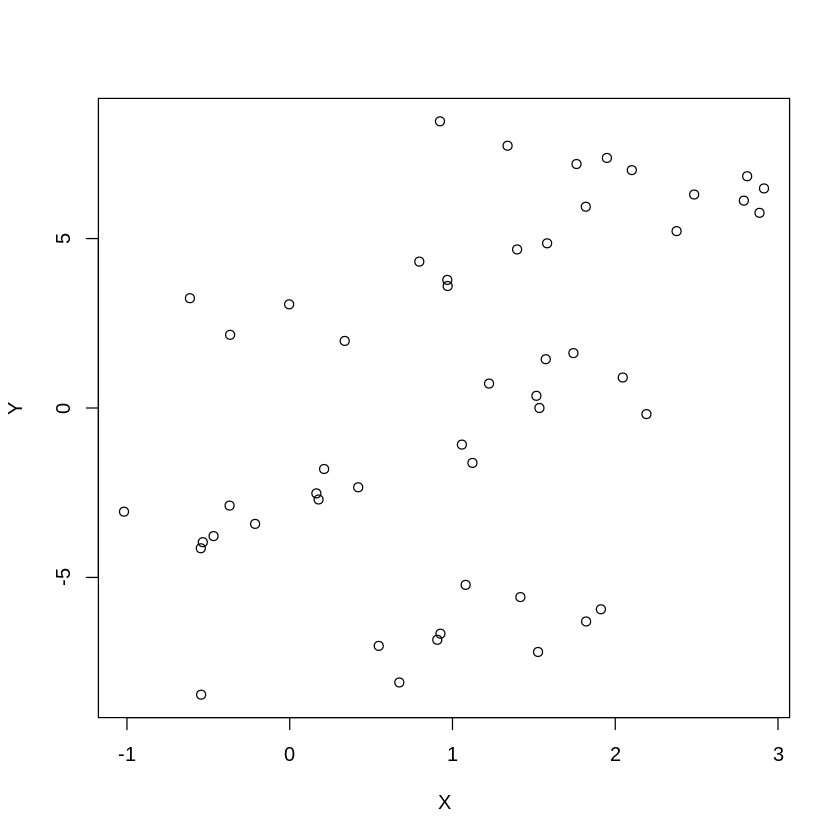


	Pearson's product-moment correlation

data:  x and y
t = 5.772, df = 99, p-value = 0.00000009011
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.339655 0.634955
sample estimates:
      cor 
0.5017848 


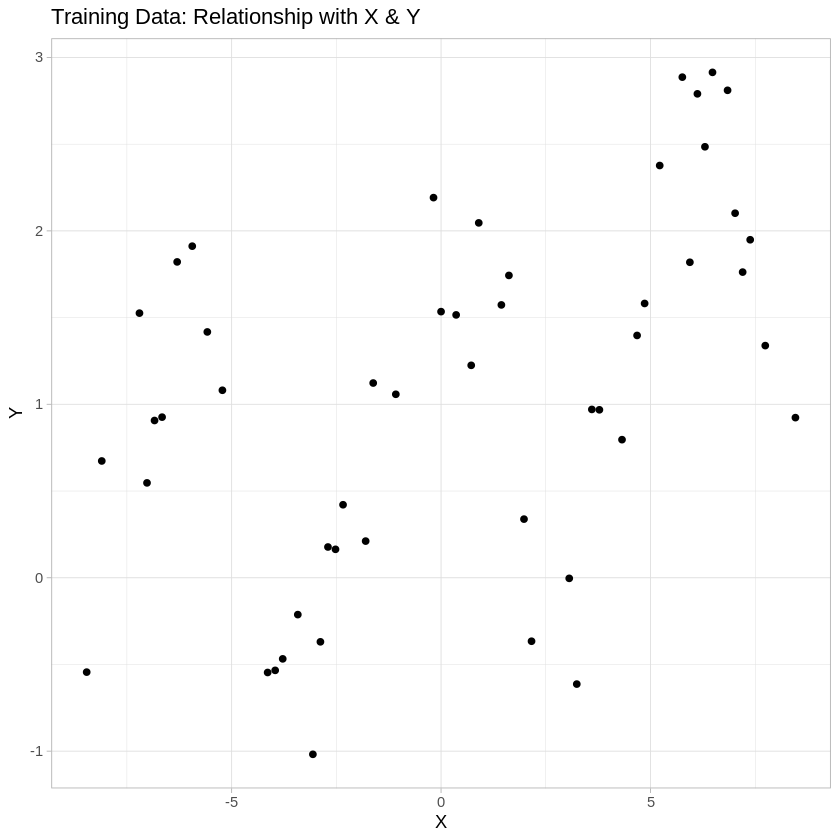

In [9]:
# built in plot in R
plot(train.df, xlab = "X", ylab = "Y")

# plotting via ggplot for practice
ggplot(data = train.df, aes(x = x, y = y)) + 
  geom_point() +
  theme_light() +
  labs(x = "X", y = "Y", title = "Training Data: Relationship with X & Y")

# check correlation with X and Y
cor.test(x, y)

How would you describe the relationship between $x$ and $y$ based on this plot?

> *There appears to a positive correlation between X and Y. When I did a quick correlation test, I found r = .5, which is a moderate correlation.*

---
## 2. Bias-variance tradeoff: polynomial regression (4 points)

Recall that in polynomial regression we increase model complexity by expanding $x$ out to the power $k$ (which we call degree).


$$Y = \hat{\beta}_0 + \sum_{j=1}^K \hat{\beta}_jX^j $$  

$$ = poly(x,k)$$

(a) Fit a 2nd degree polynomial regression model to the training data. Plot the results. 


*Hint: Use the* `help` *function to see how to use the* `stat_smooth()` *and* `poly()` *functions.*

In [ ]:
# help functions
#help(stat_smooth)
#help(poly)


Call:
lm(formula = y ~ poly(x, 2))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.87378 -0.65173  0.00684  0.58475  1.49949 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept)  0.95451    0.08244  11.578 < 0.0000000000000002 ***
poly(x, 2)1  4.75923    0.82850   5.744          0.000000104 ***
poly(x, 2)2 -0.19841    0.82850  -0.239                0.811    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8285 on 98 degrees of freedom
Multiple R-squared:  0.2522,	Adjusted R-squared:  0.237 
F-statistic: 16.53 on 2 and 98 DF,  p-value: 0.0000006528


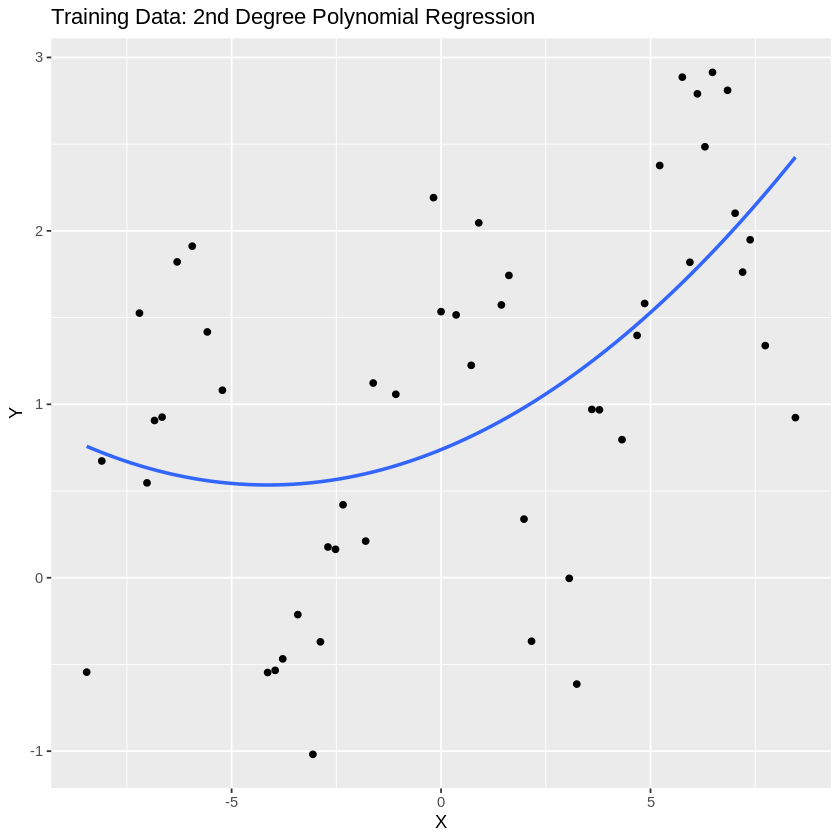

In [14]:
# fitting second degree polynomial regression model to the training data
model1 <- lm(y ~ poly(x,2))
summary(model1) # view model summary

# using ggplot
ggp1 <- ggplot(train.df, aes(x, y)) + geom_point()
# adding polynomial regression curve
ggp1 + stat_smooth(method = "lm", formula = y ~ poly(x, 2), se = FALSE) +
  labs(x = "X", y = "Y", title = "Training Data: 2nd Degree Polynomial Regression")

How well does this 2nd degree polynomial model qualitatively fit the data? Could it do better? 

> *The second degree of the polynomial fits pretty well but could possibly be better. It does capture the overall general trend of the data.*

(b) Fit a 12th degree polynomial to the data. Does this do qualitatively better or worse than the 2nd degree model?


Call:
lm(formula = y ~ poly(x, 12))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.42216 -0.28304  0.01852  0.35140  0.78672 

Coefficients:
              Estimate Std. Error t value             Pr(>|t|)    
(Intercept)    0.95451    0.04581  20.836 < 0.0000000000000002 ***
poly(x, 12)1   4.75923    0.46040  10.337 < 0.0000000000000002 ***
poly(x, 12)2  -0.19841    0.46040  -0.431             0.667561    
poly(x, 12)3  -0.13867    0.46040  -0.301             0.763977    
poly(x, 12)4  -2.91562    0.46040  -6.333    0.000000009888442 ***
poly(x, 12)5   0.04138    0.46040   0.090             0.928582    
poly(x, 12)6  -3.86688    0.46040  -8.399    0.000000000000707 ***
poly(x, 12)7   0.45343    0.46040   0.985             0.327396    
poly(x, 12)8   4.69326    0.46040  10.194 < 0.0000000000000002 ***
poly(x, 12)9   0.15745    0.46040   0.342             0.733177    
poly(x, 12)10 -1.63531    0.46040  -3.552             0.000617 ***
poly(x, 12)11  0.31751    0.46040   0.69

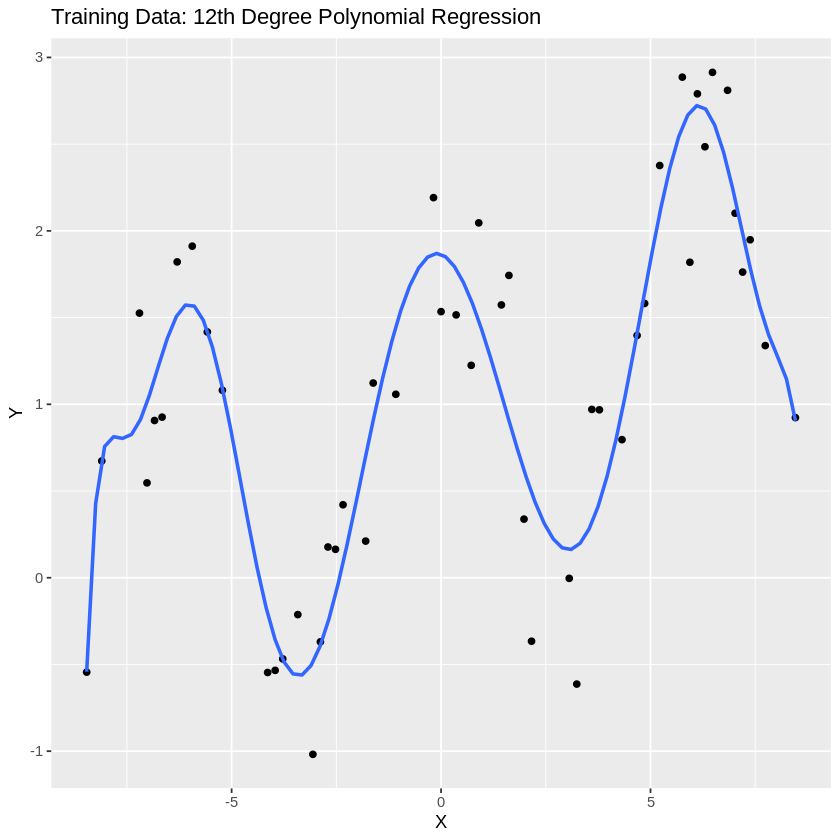

In [19]:
# fitting 12th degree polynomial regression model to the training data
model2 <- lm(y ~ poly(x,12))
summary(model2) # view model summary

# using ggplot
ggp2 <- ggplot(train.df, aes(x, y)) + geom_point()
# adding polynomial regression curve
ggp2 + stat_smooth(method = "lm", formula = y ~ poly(x, 12), se = FALSE) +
  labs(x = "X", y = "Y", title = "Training Data: 12th Degree Polynomial Regression")

> *The 2nd degree follows the more general trend, while the 12th degree really follows with the various curves of the data. We can tell from the beginning that there is a moderate positive correlation with the data, so this looks like it's kind of overfitting the data.* 
> 

(c) Modify the loop below to estimate the bias-variance tradeoff as model complexity (i.e., degree of the polynomial model, $k$) increases from 2 to 50. Use the training data to fit the model and test data to evaluate its predictive accuracy. 

Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree. 


(**Note**: We are using median accuracies here because there are often 1 or 2 outlier values in the higher degree polynomial models that can throw off the accuracy estimates).

In [16]:
# ?predict
# Now do the variance-bias trade off analysis using regular regression
degree = seq(2,50)

# Need to setup your output vectors
train_rss = matrix(data=NA,nrow=length(degree),ncol=2)
train_rss[,2] <- seq(2,50) # 50 rows
colnames(train_rss) =  c('train.output', 'k')
head(train_rss) # looks good

test_rss = matrix(data=NA,nrow=length(degree),ncol=2)
test_rss[,2] <- seq(2,50) # 51 rows
colnames(test_rss) = c('test.output', 'k')
head(test_rss) # looks good

train.output,k
NA,2
NA,3
NA,4
NA,5
NA,6
NA,7


test.output,k
NA,2
NA,3
NA,4
NA,5
NA,6
NA,7


In [17]:
for (k in degree) {
    # model
    model3 <- lm(y ~ poly(x,k, raw = TRUE), data = train.df) # every value of k, fit new model
    # pull predictions; y-hat
    train.pred <- predict(model3) # uses train.df specified above
    test.pred <- predict(model3, newdata = test.df)
    # compare predictions; get residual; observed y aka our residual error
    train.res <- train.df$y - train.pred
    test.res <- test.df$y - test.pred
    # each k, we want the median squared error for our train and test
    train.sq.err <- median((train.res)^2) # median of squared values
    test.sq.err <- median((test.res)^2) # median of squared values
    # summary stat (see how the model did); which k each goes with (k = 2, not 1)
    # output vectors, fill in iteratively; k-1 row, column 1
    train_rss[k-1,1] <- train.sq.err # object, location in object
    test_rss[k-1,1] <- test.sq.err
}

head(train_rss) # values plugged in correctly
head(test_rss) # values plugged in correctly

train.output,k
0.5575890,2
0.5060367,3
0.4681421,4
0.4650990,5
0.2090626,6
0.2050438,7


test.output,k
0.3492070,2
0.4628460,3
0.2730075,4
0.3075352,5
0.2406656,6
0.2748665,7


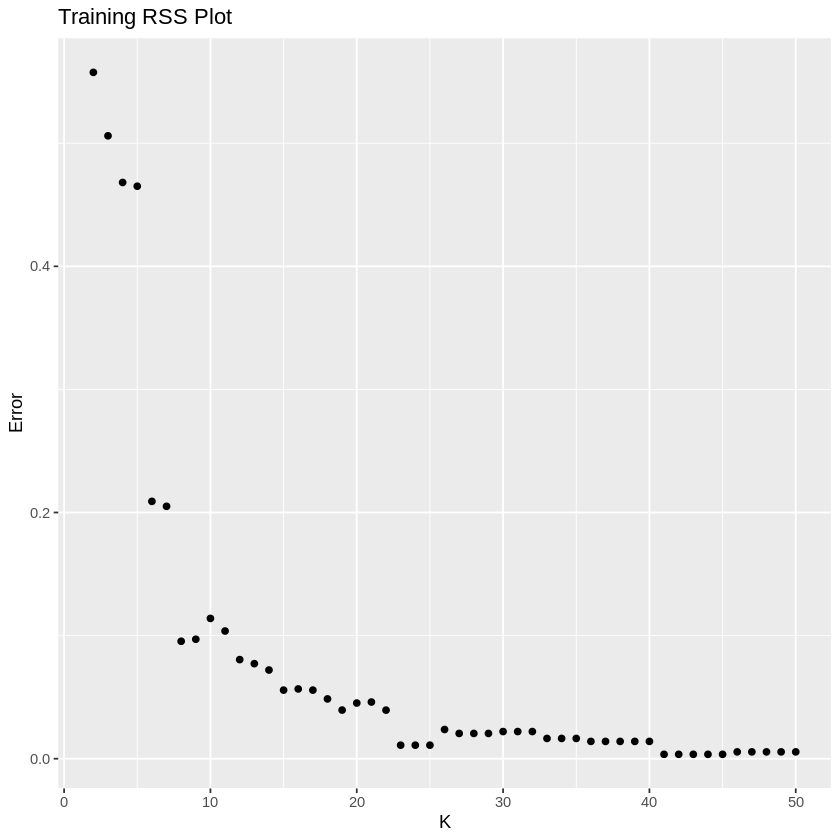

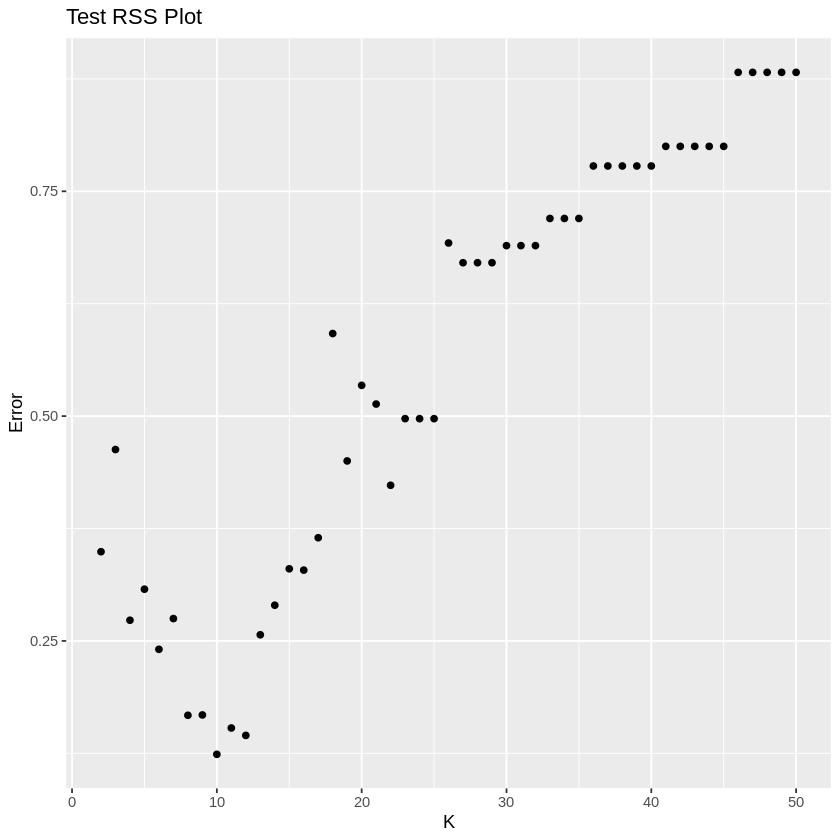

In [20]:
# make matrix a df
train.rss.df <- as.data.frame(train_rss)
# plotting just train
train.rss.plot <- ggplot(data = train.rss.df, aes(k, train.output)) +
   geom_point() +
   labs(x = "K", y = "Error", title = "Training RSS Plot")
train.rss.plot

# make matrix a df
test.rss.df <- as.data.frame(test_rss)
# plotting just test
test.rss.plot <- ggplot(data = test.rss.df, aes(k, test.output)) +
   geom_point() + 
   labs(x = "K", y = "Error", title = "Test RSS Plot")
test.rss.plot

,k,variable,value
,<dbl>,<chr>,<dbl>
1,2,train.output,0.5575890
2,3,train.output,0.5060367
3,4,train.output,0.4681421
4,5,train.output,0.4650990
5,6,train.output,0.2090626
6,7,train.output,0.2050438


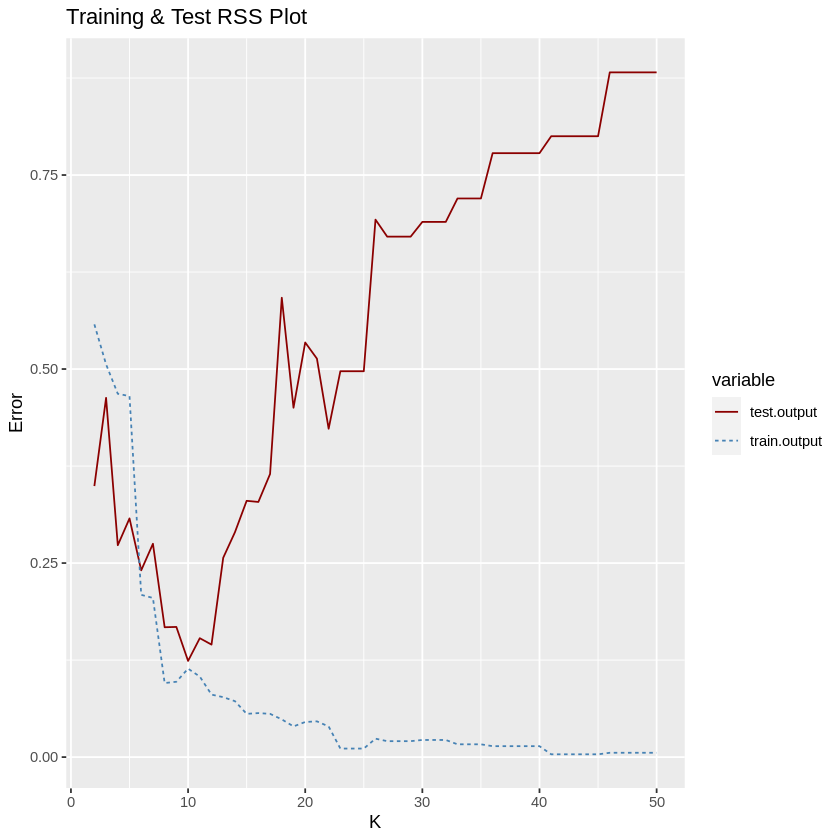

In [24]:
# merge dataframes together
both.df = merge(train.rss.df, test.rss.df, by = "k")
# head(both.df)

# reformat merged dataframe; make train.output/test.output "variable" and associated "value"
  # via tidyverse/dplyr piping
df <- both.df %>%
  select(k, train.output, test.output) %>%
  gather(key = "variable", value = "value", -k)
head(df) # looks good

# plotting together
ggplot(df, aes(x = k, y = value)) + 
  geom_line(aes(color = variable, linetype = variable)) + 
  scale_color_manual(values = c("darkred", "steelblue")) +
  labs(x = "K", y = "Error", title = "Training & Test RSS Plot")

What do you see as $k$ increase?

> *We have error on the y-axis and k on the x-axis. We can see that our train data is not fitting the test data well. There is high variance aka the training model is largely overfitting as k increases.* 
> 

(d) Now copy the code above and let's see what happens when we go beyond $p=n$ (remember, in this case $k=p$). Test polynomial models up to $k=150$. Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree. 

Use the `geom_vline()` function in `ggplot` to draw a vertical line where $k=n$ (here $n$ is the number of observations in the training set). This will make it clear where we cross the threshold for finding *unique* solutions in our data.



In [25]:
degree = seq(2,150)

# Need to setup your output vectors
train_rss = matrix(data=NA,nrow=length(degree),ncol=2)
train_rss[,2] <- seq(2,150) # 150, start at k = 2
colnames(train_rss) =  c('train.output', 'k')
head(train_rss)
nrow(train_rss) # 149, looks good

test_rss = matrix(data=NA,nrow=length(degree),ncol=2)
test_rss[,2] <- seq(2,150) # 150, start at k = 2
colnames(test_rss) = c('test.output', 'k')
head(test_rss)
nrow(test_rss) # 149, looks good

train.output,k
NA,2
NA,3
NA,4
NA,5
NA,6
NA,7


[1] 149

test.output,k
NA,2
NA,3
NA,4
NA,5
NA,6
NA,7


[1] 149

In [27]:
# basically same for loop as above

for (k in degree) {
    # model
    model3 <- lm(y ~ poly(x,k, raw = TRUE), data = train.df) # every value of k, fit new model
    # pull predictions; y-hat
    train.pred <- predict(model3)
    test.pred <- predict(model3, newdata = test.df)
    # compare predictions; get residual; observed y aka our residual error
    train.res <- train.df$y - train.pred
    test.res <- test.df$y - test.pred
    # each k, we want the median squared error for our train and test
    train.sq.err <- median((train.res)^2) # median of squared values
    test.sq.err <- median((test.res)^2) # median of squared values
    # summary stat (see how the model did); which k each goes with (k = 2, not 1)
    # output vectors, fill in iteratively; k-1 row, column 1
    train_rss[k-1,1] <- train.sq.err # object, location in object; put right hand side value in and save it
    test_rss[k-1,1] <- test.sq.err
}

head(train_rss) # values plugged in correctly
nrow(train_rss) # 149, sanity check
head(test_rss) # values plugged in correctly
nrow(test_rss) # 149, sanity check

train.output,k
0.5575890,2
0.5060367,3
0.4681421,4
0.4650990,5
0.2090626,6
0.2050438,7


[1] 149

test.output,k
0.3492070,2
0.4628460,3
0.2730075,4
0.3075352,5
0.2406656,6
0.2748665,7


[1] 149

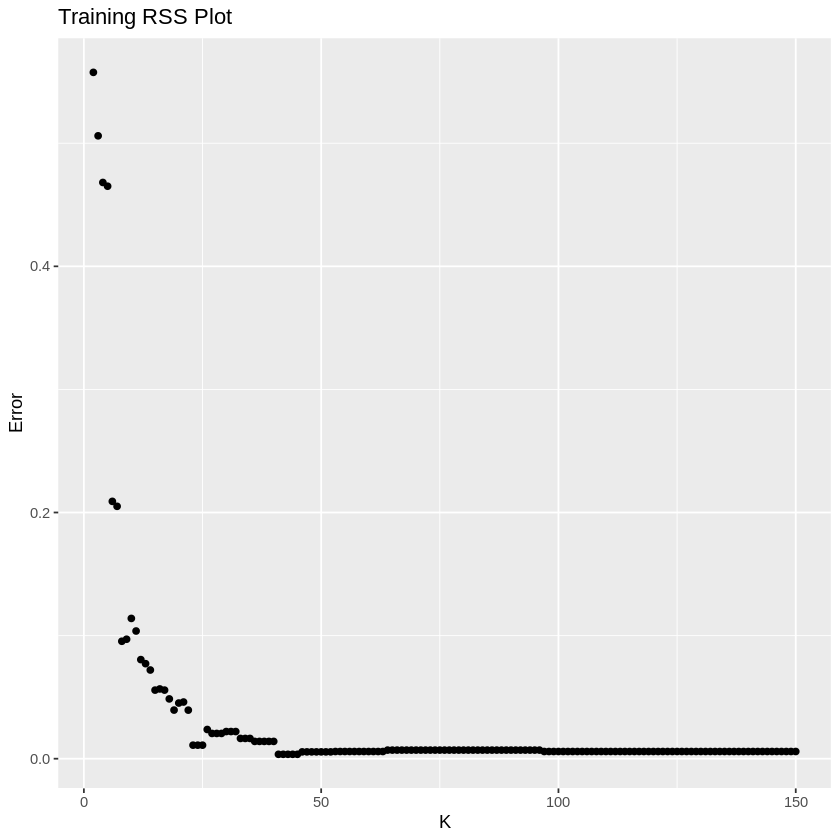

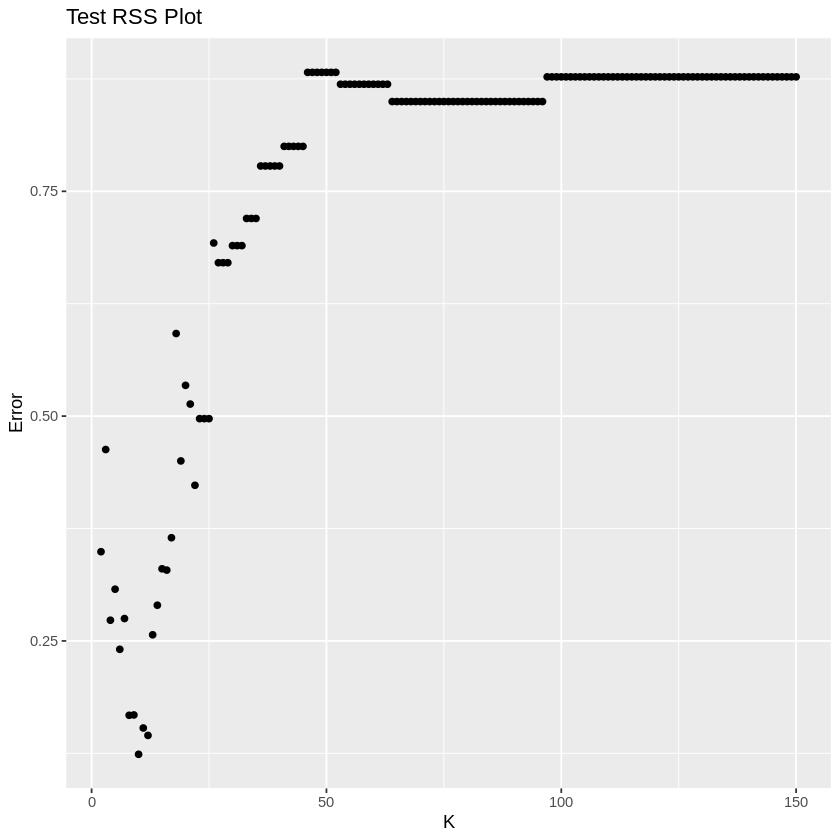

In [28]:
# make matrix a df
train.rss.df <- as.data.frame(train_rss)
# head(train.rss.df)
# plotting
train.rss.plot <- ggplot(data = train.rss.df, aes(k, train.output)) +
   geom_point() + 
   labs(x = "K", y = "Error", title = "Training RSS Plot")
train.rss.plot

# make matrix a df
test.rss.df <- as.data.frame(test_rss)
# head(test.rss.df)
# plotting
test.rss.plot <- ggplot(data = test.rss.df, aes(k, test.output)) +
   geom_point() + 
   labs(x = "K", y = "Error", title = "Test RSS Plot")
test.rss.plot

,k,train.output,test.output
,<dbl>,<dbl>,<dbl>
1,2,0.5575890,0.3492070
2,3,0.5060367,0.4628460
3,4,0.4681421,0.2730075
4,5,0.4650990,0.3075352
5,6,0.2090626,0.2406656
6,7,0.2050438,0.2748665


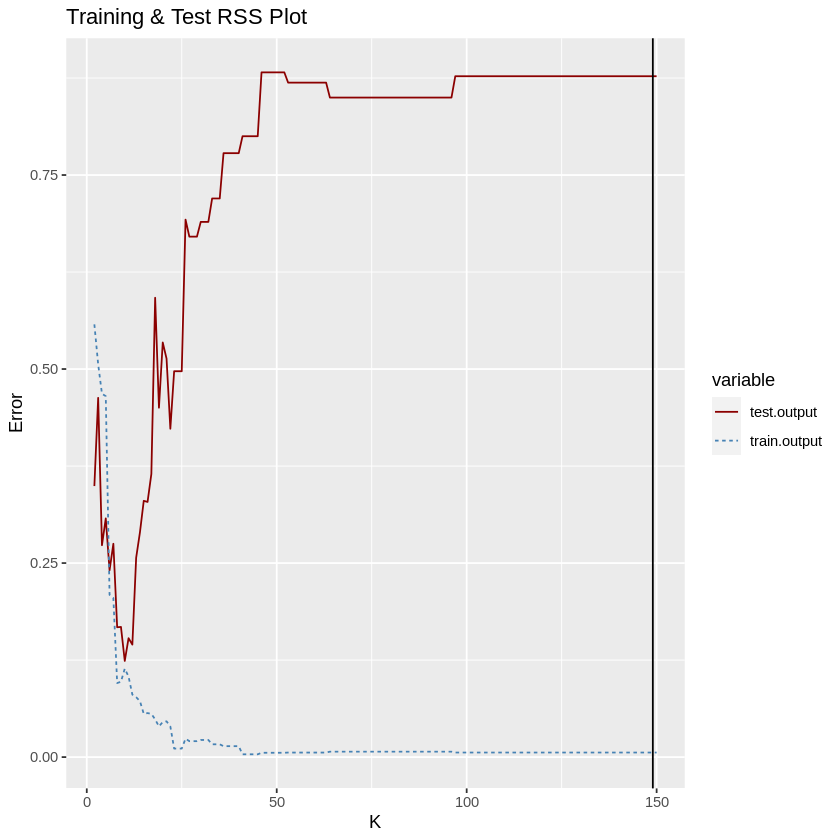

In [30]:
# merge together
both.df = merge(train.rss.df, test.rss.df, by = "k")
head(both.df)

# reformat merged dataframe; make train.output/test.output "variable" and associated "value"
df <- both.df %>%
  select(k, train.output, test.output) %>%
  gather(key = "variable", value = "value", -k)

# plotting together
ggplot(df, aes(x = k, y = value)) + 
  geom_line(aes(color = variable, linetype = variable)) + 
  scale_color_manual(values = c("darkred", "steelblue")) +
  geom_vline(xintercept = 149) + 
    labs(x = "K", y = "Error", title = "Training & Test RSS Plot")

What do you see as $k$ gets larger than $n$?

> *We again have error on the y-axis and k on the x-axis. We can see that our train data is not fitting the test data well. There is high variance aka the training model is largely overfitting. There is even more overfitting with an even larger k. Thsu when K gets larger than N, there is even more overfitting.* 
> 

---
## 3. Applying regularization to the model fits (2 points)

Repeat the previous bias-variance tradeoff test, going up to $k=150$, but now use ridge regression with a sparsity parameter of $\lambda=0.00005$. Plot your results the same way as last time. 

In [52]:
set.seed(123)

# Now do the variance-bias trade off analysis using ridge regression
# think hard about your new data argument in the predict function

lambda=0.00005
degree = seq(2,150)

rm(train_rss, test_rss)

train_rss = matrix(data=NA,nrow=length(degree),ncol=2)
train_rss[,2] <- seq(2,150) # 150, start at k = 2
colnames(train_rss) =  c('train.value',"k")

test_rss = matrix(data=NA,nrow=length(degree),ncol=2)
test_rss[,2] <- seq(2,150) # 150, start at k = 2
colnames(test_rss) =  c('test.value',"k")

head(train_rss)
nrow(train_rss)
head(test_rss)
nrow(test_rss)

train.value,k
NA,2
NA,3
NA,4
NA,5
NA,6
NA,7


[1] 149

test.value,k
NA,2
NA,3
NA,4
NA,5
NA,6
NA,7


[1] 149

In [53]:
for (k in degree) {
    ridge.mod <- glmnet(poly(x,k, raw = TRUE), y, alpha = 0, lambda = lambda)
    # pull predictions
    train.pred <- predict(ridge.mod, newx = poly(x,k, raw = TRUE))
    test.pred <- predict(ridge.mod, newx = poly(x,k, raw = TRUE))
    # compare predictions; get residual; observed y aka our residual error
    train.res <- train.df$y - train.pred
    test.res <- test.df$y - test.pred
    # each k, we want the median squared error for our train and test
    train.sq.err <- median((train.res)^2) # median of squared values
    test.sq.err <- median((test.res)^2) # median of squared values
    # summary stat (see how the model did); which k each goes with (k = 2, not 1)
    # output vectors, fill in iteratively; k-1 row, column 1
    train_rss[k-1,1] <- train.sq.err # object, location in object; put right hand side value in and save it
    test_rss[k-1,1] <- test.sq.err
}

,train.value,k
,<dbl>,<dbl>
1,0.6624282,2
2,0.6551209,3
3,0.8024989,4
4,0.7990214,5
5,0.6269012,6
6,0.6109070,7


,test.value,k
,<dbl>,<dbl>
1,0.3966858,2
2,0.3825716,3
3,0.3166874,4
4,0.3173365,5
5,0.2655597,6
6,0.2860114,7


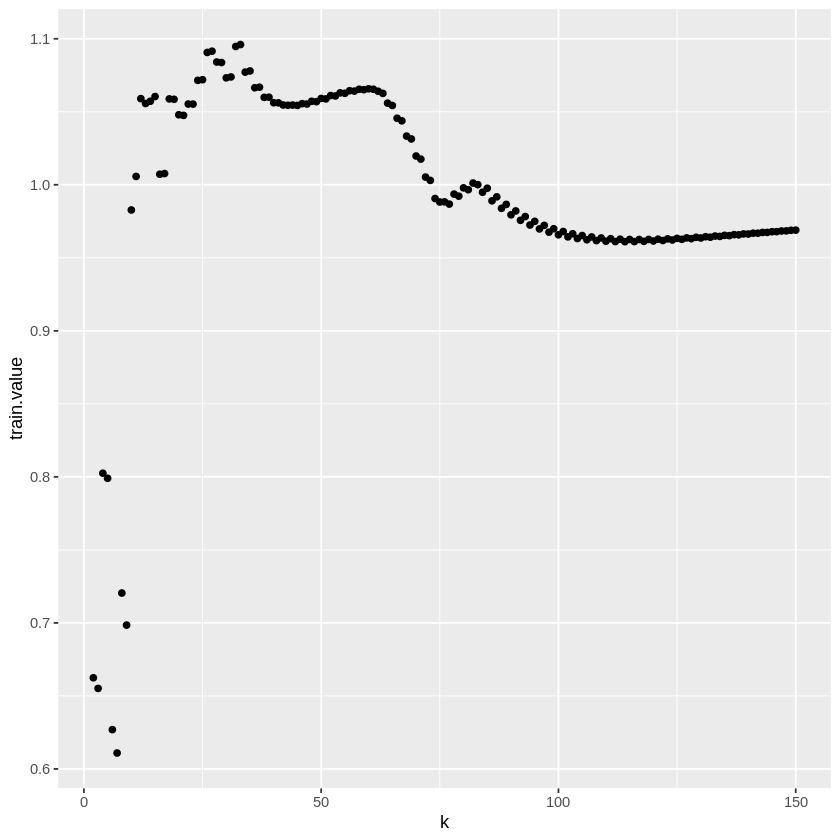

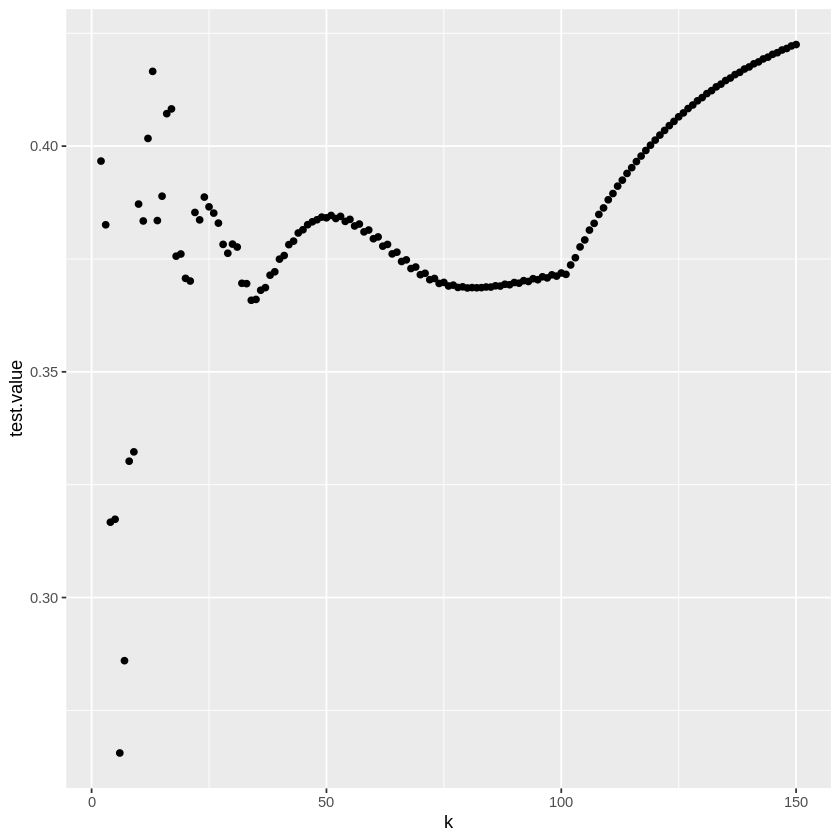

In [54]:
# make matrix a df
train.rss.df <- as.data.frame(train_rss)
head(train.rss.df)
train.rss.plot <- ggplot(data = train.rss.df, aes(k, train.value)) +
  geom_point()
train.rss.plot

# make matrix a df
test.rss.df <- as.data.frame(test_rss)
head(test.rss.df)
test.rss.plot <- ggplot(data = test.rss.df, aes(k, test.value)) +
  geom_point()
test.rss.plot

,k,train.value,test.value
,<dbl>,<dbl>,<dbl>
1,2,0.6624282,0.3966858
2,3,0.6551209,0.3825716
3,4,0.8024989,0.3166874
4,5,0.7990214,0.3173365
5,6,0.6269012,0.2655597
6,7,0.6109070,0.2860114


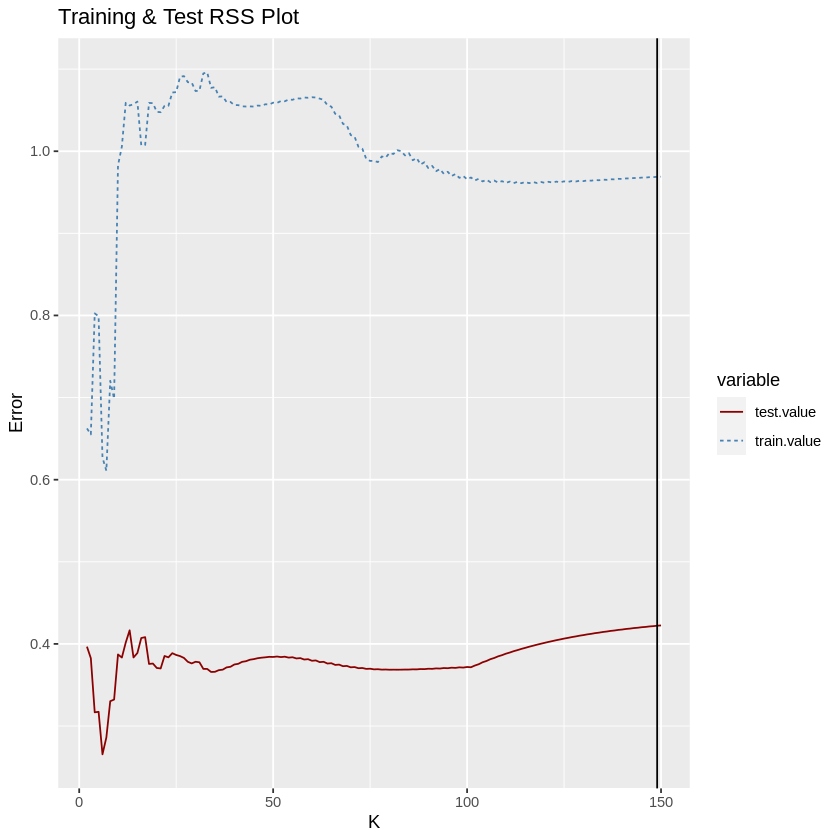

In [57]:
# merge together
both.df = merge(train.rss.df, test.rss.df, by = "k")
head(both.df)

# reformat merged dataframe; make train.output/test.output "variable" and associated "value"
df <- both.df %>%
  select(k, train.value, test.value) %>%
  gather(key = "variable", value = "value", -k)

# plotting together
ggplot(df, aes(x = k, y = value)) + 
  geom_line(aes(color = variable, linetype = variable)) + 
  scale_color_manual(values = c("darkred", "steelblue")) +
  geom_vline(xintercept = 149) + 
    labs(x = "K", y = "Error", title = "Training & Test RSS Plot")

What happens now when $k$ gets larger than $n$?

> *The error is much higher. But I know for ridge regression that K getting larger than N shouldn't be an issue, so I think I just did something wrong?* 

---
## 4. Reflection (2 points)

The simulations above should have shown that, when applying a regularization (i.e., a sparsity constraint), the behavior of the bias-variance tradeoff changes. Explain why this happens.

> *As per the lecture, we know that ridge regression manages the bias-variance tradeoff by minimizing the effect of weaker predictor variables where they approach [but don't reach] zero. In other words, ridge always returns all p predictors, lambda increasing results in weaker coefficients, and ridge manages the bias-variance tradeoff by reducing the influence of weak predictor variables. So as lambda increases, the flexibility of the ridge regression fit leads to decreased variance but increased bias. By implementing a sparsity constraint here, we help promote better model fitting (aka our train versus our test.).* 

--- 
## Bonus (1 extra credit point)
Recall that the $p=n$ threshold defines the limit for finding a *unique* solution to $Y=F(X)$ (i.e., there is only one combination of regression coefficients that is *best* at explaining variance in $Y$). With this in mind, what is regularization doing that works around this upper limit?

> *As n -> p, model dimensionality increases and model variance also increases, which leads to an increase in model flexibility.*

> *In the context of ridge regression as regularization, it works with the advantage of not needing unbiased estimators. Instead, it adds bias to estimators to reduce standard error. Ridge adds enough bias to make the estimates a reliable representation of the population of data. The fundamental assumption of ordinary least squares is that all variables are independent and model complexity is is driven by the number of features in your model. If we have correlated variables, this breaks down (e.g., accidental duplicates that are perfectly correlated). OLS will have significant effects for both variables and would think the model is thus more complex even though it's just the same feature copied over. We should be thinking about complexity in the context of the number of features compared to true model complexity. True complexity removes meaningless correlations. If a model has more correlations, it's not necessarily more complex. Ridge gives weight to one of the correlated features but not the other and thus accounts for the fact that the variables are indeed the same. Therefore Ridge gives the bigger and more impactful features more notice and less focus on the noisy/less impactful parameters/features.*

> *By adding lambda aka a sparsity parameter, regularization works around this upper limit. A higher lambda results in weaker betas. LASSO eliminates predictors and elastic net does a bit of ridge and a bit of LASSO. Regularization implements sparsity/feature selection.*

**DUE:** 5pm EST, April 12, 2023; extension until Friday, April 14th

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*